In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from itertools import cycle

from scipy import interp

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, make_scorer, f1_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/train_clean_degree5.csv')
train = train.iloc[:, 1:]
train.head()

,signal,open_channels
0,-2.7600,0
1,-2.8557,0
2,-2.4074,0
3,-3.1404,0
4,-3.1525,0


In [ ]:
train.corr()

,signal,open_channels
signal,1.000000,0.958721
open_channels,0.958721,1.000000


In [ ]:
scaler = MinMaxScaler()
train['signal'] = scaler.fit_transform(np.array(train['signal']).reshape(-1, 1))

In [ ]:
train.head()

,signal,open_channels
0,0.210728,0
1,0.204086,0
2,0.235197,0
3,0.184329,0
4,0.183489,0


### Segmented Approach

In [ ]:
# 5 models to be created -- 1s, 1f, 3, 5, 10
knn_1s = KNeighborsClassifier(weights='distance')
knn_1f = KNeighborsClassifier(weights='distance')
knn_3 = KNeighborsClassifier(weights='distance')
knn_5 = KNeighborsClassifier(weights='distance')
knn_10 = KNeighborsClassifier(weights='distance')

In [ ]:
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='not majority'), random_state=100)

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
import numpy as np

arr = np.array(
[0.97512374, 0.97510321, 0.97540913, 0.97487094, 0.97548163,
0.97579583, 0.97516264, 0.97501653, 0.97521015, 0.97521021]
               )
arr.mean()

0.975238401

In [ ]:
arr.std()

0.0002494085979051339

In [ ]:
X, y = resample.fit_sample(np.array(train['signal'][0:1000000]).reshape(-1, 1), np.array(train['open_channels'][0:1000000]).reshape(-1, 1))

scoring = {'roc_auc' : make_scorer(roc_auc_score)}
results = cross_validate(estimator=knn_1s, X=X, y=y, cv=k_fold, scoring=scoring)
results

{'fit_time': array([3.3037293 , 3.95082283, 3.19242024, 4.0049963 , 4.35322428,
        4.34410286, 4.04452109, 3.2638576 , 3.88519669, 3.07905126]),
 'score_time': array([1.22070813, 1.19833136, 1.29943943, 1.44911146, 1.22909713,
        1.20287156, 1.19350529, 1.06522989, 1.17371488, 1.12585306]),
 'test_roc_auc': array([0.99886589, 0.99892183, 0.99889168, 0.99904798, 0.9988519 ,
        0.9988592 , 0.998969  , 0.9988543 , 0.99895335, 0.99887606])}

In [ ]:
rf1f_X = np.concatenate([train['signal'].values[1000000: 1500000], train['signal'].values[3000000: 3500000]])
rf1f_y = np.concatenate([train['open_channels'].values[1000000: 1500000], train['open_channels'].values[3000000: 3500000]])

X, y = resample.fit_sample(np.array(rf1f_X).reshape(-1, 1), np.array(rf1f_y).reshape(-1, 1))
results_1f = cross_validate(estimator=knn_1f, X=X, y=y, cv=k_fold, scoring=scoring)
results_1f

{'fit_time': array([1.46542597, 1.49759889, 1.46086788, 1.52635956, 1.76005936,
        1.64247918, 1.51528335, 1.78034568, 1.48586655, 1.57658744]),
 'score_time': array([0.62239146, 0.63558364, 0.59218764, 0.6033597 , 0.60804081,
        0.6333077 , 0.58761764, 0.63136649, 0.55480838, 0.6214397 ]),
 'test_roc_auc': array([0.99827026, 0.99841687, 0.99844511, 0.99840823, 0.99839102,
        0.9984948 , 0.99848411, 0.99826595, 0.99844969, 0.99828784])}

In [ ]:
rf3_X = np.concatenate([train['signal'].values[1500000: 2000000], train['signal'].values[3500000: 4000000]])
rf3_y = np.concatenate([train['open_channels'].values[1500000: 2000000], train['open_channels'].values[3500000: 4000000]])

scoring = {'roc_auc' : make_scorer(roc_auc_score, average='macro', multi_class='ovr')}
X, y = resample.fit_sample(np.array(rf3_X).reshape(-1, 1), np.array(rf3_y).reshape(-1, 1))
lb = LabelBinarizer()
y = lb.fit_transform(y)
results_3 = cross_validate(estimator=knn_3, X=X, y=y, cv=k_fold, scoring=scoring)
results_3

In [ ]:
rf5_X = np.concatenate([train['signal'].values[2500000: 3000000], train['signal'].values[4000000: 4500000]])
rf5_y = np.concatenate([train['open_channels'].values[2500000: 3000000], train['open_channels'].values[4000000: 4500000]])

X, y = resample.fit_sample(np.array(rf5_X).reshape(-1, 1), np.array(rf5_y).reshape(-1, 1))
scoring = {'roc_auc' : make_scorer(roc_auc_score, average='macro', multi_class='ovr')}
lb = LabelBinarizer()
y = lb.fit_transform(y)
results_5 = cross_validate(estimator=knn_5, X=X, y=y, cv=k_fold, scoring=scoring)
results_5

In [ ]:
rf10_y = np.concatenate([train['open_channels'].values[2000000: 2500000], train['open_channels'].values[4500000: 5000000]])

rf10_y = pd.Series(rf10_y)
index =np.array([rf10_y[rf10_y == 0].index[0], rf10_y[rf10_y == 0].index[1]])
rf10_X = np.concatenate([train['signal'].values[2000000: 2500000], train['signal'].values[4500000: 5000000]])
rf10_y = np.concatenate([train['open_channels'].values[2000000: 2500000], train['open_channels'].values[4500000: 5000000]])
rf10_X = np.delete(rf10_X, index)
rf10_y = np.delete(rf10_y, index)
resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='not majority', n_neighbors=2), random_state=100)
X, y = resample.fit_sample(np.array(rf10_X).reshape(-1, 1), np.array(rf10_y).reshape(-1, 1))
lb = LabelBinarizer()
y = lb.fit_transform(y)
results_10 = cross_validate(estimator=knn_10, X=X, y=y, cv=k_fold, scoring=scoring)
results_10

### Traditional Approach

In [ ]:
knn_full = KNeighborsClassifier(weights='distance', n_neighbors=5)

resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='not majority'), random_state=100)
X, y = resample.fit_sample(np.array(train['signal']).reshape(-1, 1), np.array(train['open_channels']).reshape(-1, 1))

In [ ]:
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [ ]:
scoring = {'roc_auc' : make_scorer(roc_auc_score, average='macro', multi_class='ovr')}
results_full = cross_validate(estimator=knn_full, X=X, y=y, cv=k_fold, scoring=scoring)
results_full

{'fit_time': array([31.39008999, 31.45761085, 28.80898142, 34.16961598, 29.00011468,
        33.9434011 , 35.47163534, 34.56068063, 30.94282651, 31.93571877]),
 'score_time': array([ 6.63669872,  7.52725935,  7.52911496,  7.8980906 ,  7.32159615,
         7.88629007,  7.40735102,  8.07201266, 10.48355341,  8.04285192]),
 'test_roc_auc': array([0.99812981, 0.99813296, 0.99808186, 0.99801793, 0.99803398,
        0.99818382, 0.99808859, 0.99809167, 0.99815037, 0.99802546])}

### Class-wise ROC plot

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

classifier = OneVsRestClassifier(knn_full)

In [ ]:
classifier.fit(X_train, y_train)
n_classes = 11

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [ ]:
y_score = classifier.predict(X_test)

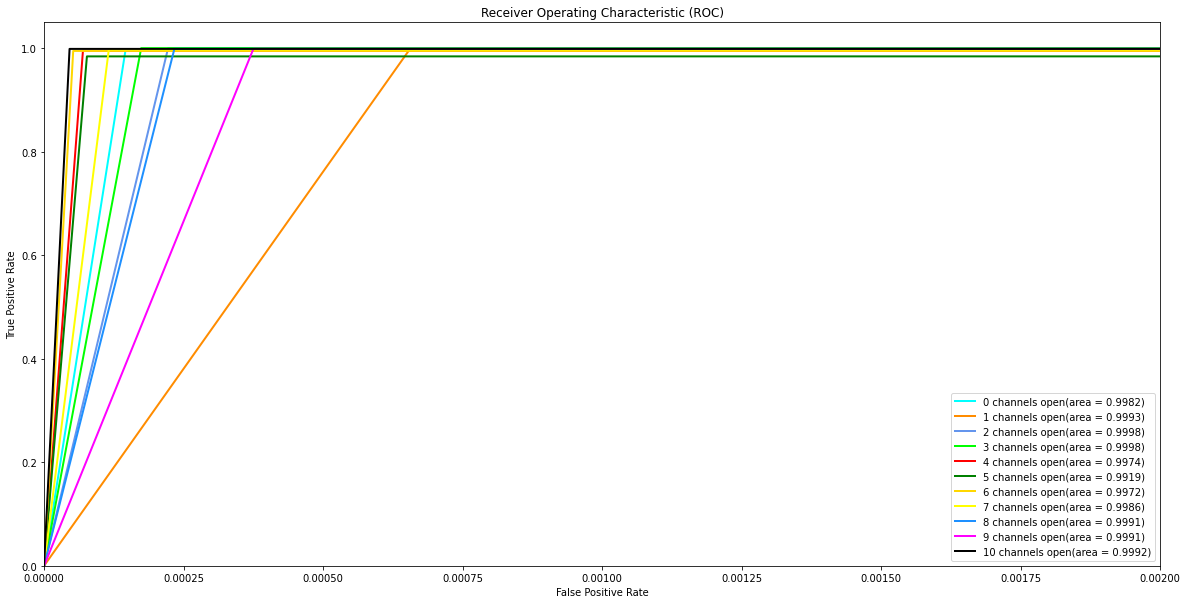

In [ ]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

plt.figure(figsize=(15, 7.5))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'lime', 'red', 'green', 'gold', 'yellow', 'dodgerblue', 'magenta', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} channels open(area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 0.002])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#### Finding optimal k value for kNN

In [ ]:
# knn_full = KNeighborsClassifier(weights='distance')

# resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='not majority', n_neighbors=2), random_state=100)
# X, y = resample.fit_sample(np.array(train_df[1]).reshape(-1, 1), np.array(train_df[2]).reshape(-1, 1))
# lb = LabelBinarizer()
# y = lb.fit_transform(y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# error_rate = []
# min_error_k = 0
# min_error = 0
# for i in range(1, 2001, 100):
#   knn_full = KNeighborsClassifier(n_neighbors=i)
#   knn_full.fit(X_train,y_train)
#   pred_i = knn_full.predict(X_test)
#   error_rate.append(np.mean(pred_i != y_test))
#   if(min_error>np.mean(pred_i != y_test)):
#     min_error_k = i

# min_error_k

# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# results_full = cross_validate(estimator=knn_full, X=X, y=y, cv=k_fold, scoring=scoring)
# results_full